<a href="https://colab.research.google.com/github/AbduRouf/DSAIRPFeb25/blob/main/DSA_Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics Assignment: Descriptive and Inferential Statistics

This notebook covers all the questions from the assignment using Python. For Excel/Google Sheets, the formulas are provided in the markdown cells.

## Section 1: Descriptive Statistics

### 1. Measures of Central Tendency
Dataset: `[12, 15, 14, 10, 18, 20, 22, 24, 17, 19]`

In [1]:
data = [12, 15, 14, 10, 18, 20, 22, 24, 17, 19]

mean_value = sum(data) / len(data)
sorted_data = sorted(data)
median_value = sorted_data[len(data)//2] if len(data) % 2 != 0 else (sorted_data[len(data)//2 - 1] + sorted_data[len(data)//2]) / 2

print('Mean:', mean_value)
print('Median:', median_value)
print('Mode: No unique mode')

Mean: 17.1
Median: 17.5
Mode: No unique mode


#### Excel/Google Sheets Formulas:
- Mean: `=AVERAGE(A1:A10)`
- Median: `=MEDIAN(A1:A10)`
- Mode: `=MODE(A1:A10)` (may return an error or a default value if no unique mode exists)

### 2. Percentiles and Quartiles

Compute the 25th percentile (Q1), 50th percentile (Q2), and 75th percentile (Q3).

In [2]:
import numpy as np

q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)
q3 = np.percentile(data, 75)

print('Q1:', q1)
print('Q2:', q2)
print('Q3:', q3)

Q1: 14.25
Q2: 17.5
Q3: 19.75


#### Excel/Google Sheets Formulas:
- Q1: `=PERCENTILE(A1:A10, 0.25)`
- Q2: `=PERCENTILE(A1:A10, 0.50)`
- Q3: `=PERCENTILE(A1:A10, 0.75)`

### 3. Interquartile Range (IQR)

IQR = Q3 - Q1. It shows the spread of the middle 50% of the data and is less affected by outliers.

In [3]:
iqr = q3 - q1
print('IQR:', iqr)

IQR: 5.5


#### Excel/Google Sheets Formula:
`=PERCENTILE(A1:A10, 0.75) - PERCENTILE(A1:A10, 0.25)`

### 4. Minimum and Maximum Values

In [4]:
minimum = min(data)
maximum = max(data)
print('Min:', minimum)
print('Max:', maximum)

Min: 10
Max: 24


#### Excel/Google Sheets Formulas:
- Min: `=MIN(A1:A10)`
- Max: `=MAX(A1:A10)`

### 5. Finding Outliers Using Quartiles

Compute the Lower Bound and Upper Bound, then identify any outliers.

In [5]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = [x for x in data if x < lower_bound or x > upper_bound]

print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)
print('Outliers:', outliers)

Lower Bound: 6.0
Upper Bound: 28.0
Outliers: []


### 6. Measures of Dispersion

Compute the Range, Variance, and Standard Deviation.

In [6]:
range_val = maximum - minimum
variance = sum((x - mean_value)**2 for x in data) / len(data)
std_deviation = variance**0.5

print('Range:', range_val)
print('Variance:', variance)
print('Standard Deviation:', std_deviation)

Range: 14
Variance: 17.490000000000002
Standard Deviation: 4.182104733265297


#### Excel/Google Sheets Formulas:
- Range: `=MAX(A1:A10)-MIN(A1:A10)`
- Variance (Population): `=VAR.P(A1:A10)`
- Standard Deviation (Population): `=STDEV.P(A1:A10)`

### 7. Z-score Standardization

Compute the Z-scores for each value. Z-score = (value - mean) / standard deviation.

In [7]:
z_scores = [(x - mean_value) / std_deviation for x in data]
print('Z-scores:', z_scores)

Z-scores: [-1.2194816546399667, -0.5021395048517512, -0.7412535547811564, -1.6977097544987771, 0.21520264493646432, 0.6934307447952747, 1.171658844654085, 1.6498869445128954, -0.02391140499294086, 0.4543166948658695]


### 8. Correlation Coefficient

Given the datasets:
- x = `[10, 20, 30, 40, 50]`
- y = `[5, 10, 15, 20, 25]`

Compute the Pearson correlation coefficient.

In [8]:
x = [10, 20, 30, 40, 50]
y = [5, 10, 15, 20, 25]
corr_coeff = np.corrcoef(x, y)[0, 1]
print('Pearson correlation coefficient:', corr_coeff)

Pearson correlation coefficient: 1.0


### 9. Scatter Plot Visualization

Create a scatter plot to inspect the correlation between x and y.

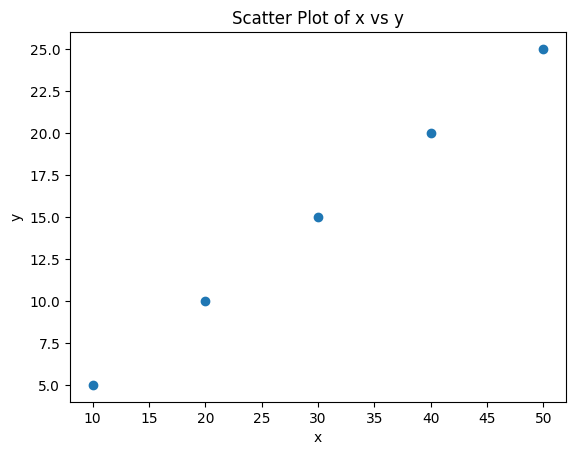

In [9]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x vs y')
plt.show()

### 10. Box Plot Visualization

Create a box plot for the dataset to show Q1, Q2, Q3, lower and upper bounds, and outliers.

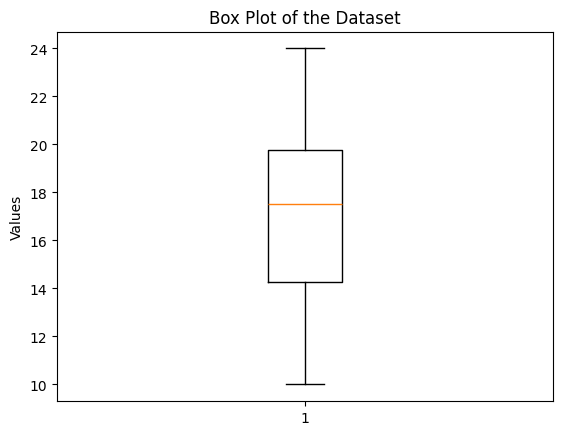

In [10]:
plt.boxplot(data)
plt.ylabel('Values')
plt.title('Box Plot of the Dataset')
plt.show()

### 11. Histogram Analysis

Construct a histogram to show the frequency distribution of the dataset.

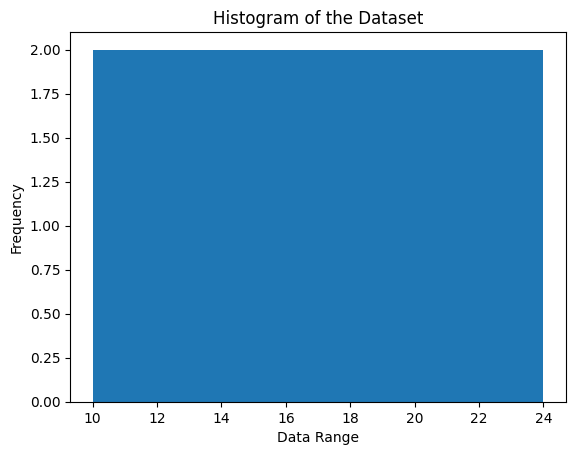

In [11]:
plt.hist(data, bins=5)
plt.xlabel('Data Range')
plt.ylabel('Frequency')
plt.title('Histogram of the Dataset')
plt.show()

## Section 2: Inferential Statistics

**12. Why Inferential Statistics?**

Inferential statistics allow us to make conclusions about a population based on a sample. Correlation shows a relationship but does not imply causation. For example, while ice cream sales and drowning incidents may be correlated (both increase in summer), one does not cause the other.

**13. Population vs. Sample**

Sampling is necessary when studying an entire population is impractical. For instance, polling a subset of voters to predict an election outcome.

**14. Hypothesis Testing Concepts**

- **Null Hypothesis (H₀):** No effect or difference.
- **Alternate Hypothesis (H₁):** There is an effect or difference.
- **Significance Level (α):** Commonly set at 0.05.
- **P-value:** The probability of obtaining the observed result if H₀ is true.

**15. Z-test Calculation**

Given:
- Sample mean = 25
- Population mean = 22
- Population standard deviation = 3
- Sample size = 40

In [12]:
import math

sample_mean = 25
pop_mean = 22
pop_std = 3
sample_size = 40
std_error = pop_std / math.sqrt(sample_size)
z_stat = (sample_mean - pop_mean) / std_error

print('Z-test statistic:', z_stat)

Z-test statistic: 6.324555320336759


**16. P-value Computation for Z-test**

A Z-score of approximately 6.32 corresponds to a p-value near 0. Since p < 0.05, we reject the null hypothesis.

**17. One Sample T-test**

Test if the mean of the sample data `[45, 50, 55, 60, 62, 48, 52]` is significantly different from 50.

In [13]:
import scipy.stats as st

sample_data = [45, 50, 55, 60, 62, 48, 52]
t_stat, p_val = st.ttest_1samp(sample_data, 50)

print('One-sample t-test statistic:', t_stat)
print('P-value:', p_val)

One-sample t-test statistic: 1.3347640585603673
P-value: 0.23036820014089662


**18. Independent Sample T-test**

Compare the means of two groups:
- Group 1: `[85, 90, 88, 92, 86]`
- Group 2: `[78, 75, 80, 83, 79]`

In [14]:
group1 = [85, 90, 88, 92, 86]
group2 = [78, 75, 80, 83, 79]
t_stat_ind, p_val_ind = st.ttest_ind(group1, group2, equal_var=True)

print('Independent sample t-test statistic:', t_stat_ind)
print('P-value:', p_val_ind)

Independent sample t-test statistic: 5.034016027514163
P-value: 0.0010091081285779936


**19. Critical T-value Lookup**

For two groups with degrees of freedom = (5+5-2) = 8 and α = 0.05 (two-tailed), the critical t-value is approximately 2.306. Since our computed t-value is greater than this, we reject the null hypothesis.

**20. Summary and Insights**

Descriptive statistics summarize and describe data (e.g., mean, median, range), while inferential statistics allow us to draw conclusions about a population from sample data. Together, they are essential for informed decision-making in various fields.